In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
from pandas_datareader import data as pdr
# import fix_yahoo_finance
import yfinance


df = pdr.get_data_yahoo('AAPL', start='2010-04-23', end='2022-05-24')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-22,9.526786,9.150000,9.222857,9.516786,793424800.0,8.137023
2010-04-23,9.720714,9.535714,9.571071,9.672500,796955600.0,8.270162
2010-04-26,9.730714,9.578214,9.710000,9.625000,479068800.0,8.229549
2010-04-27,9.565714,9.304286,9.545357,9.358571,709343600.0,8.001747
2010-04-28,9.428571,9.157500,9.401786,9.342857,758402400.0,7.988309


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-18,147.360001,139.899994,146.850006,140.820007,109742900.0,140.820007
2022-05-19,141.660004,136.600006,139.880005,137.350006,136095600.0,137.350006
2022-05-20,140.699997,132.610001,139.089996,137.589996,137426100.0,137.589996
2022-05-23,143.259995,137.649994,137.789993,143.110001,117726300.0,143.110001
2022-05-24,141.970001,137.330002,140.809998,140.360001,104132700.0,140.360001


In [5]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-04-22,9.526786,9.150000,9.222857,9.516786,793424800.0,8.137023
1,2010-04-23,9.720714,9.535714,9.571071,9.672500,796955600.0,8.270162
2,2010-04-26,9.730714,9.578214,9.710000,9.625000,479068800.0,8.229549
3,2010-04-27,9.565714,9.304286,9.545357,9.358571,709343600.0,8.001747
4,2010-04-28,9.428571,9.157500,9.401786,9.342857,758402400.0,7.988309


In [6]:
df=df.drop(['Date', 'Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,9.526786,9.150000,9.222857,9.516786,793424800.0
1,9.720714,9.535714,9.571071,9.672500,796955600.0
2,9.730714,9.578214,9.710000,9.625000,479068800.0
3,9.565714,9.304286,9.545357,9.358571,709343600.0
4,9.428571,9.157500,9.401786,9.342857,758402400.0


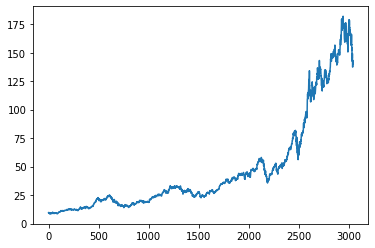

In [7]:
plt.plot(df.Close)

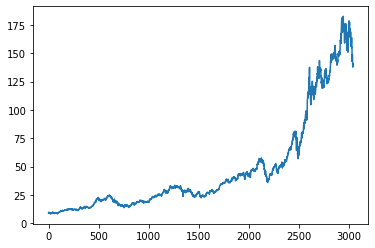

In [8]:
plt.plot(df.Open)

In [9]:
df

,High,Low,Open,Close,Volume
0,9.526786,9.150000,9.222857,9.516786,793424800.0
1,9.720714,9.535714,9.571071,9.672500,796955600.0
2,9.730714,9.578214,9.710000,9.625000,479068800.0
3,9.565714,9.304286,9.545357,9.358571,709343600.0
4,9.428571,9.157500,9.401786,9.342857,758402400.0
...,...,...,...,...,...
3040,147.360001,139.899994,146.850006,140.820007,109742900.0
3041,141.660004,136.600006,139.880005,137.350006,136095600.0
3042,140.699997,132.610001,139.089996,137.589996,137426100.0
3043,143.259995,137.649994,137.789993,143.110001,117726300.0


In [10]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3040    166.3318
3041    165.9020
3042    165.4850
3043    165.1223
3044    164.7439
Name: Close, Length: 3045, dtype: float64

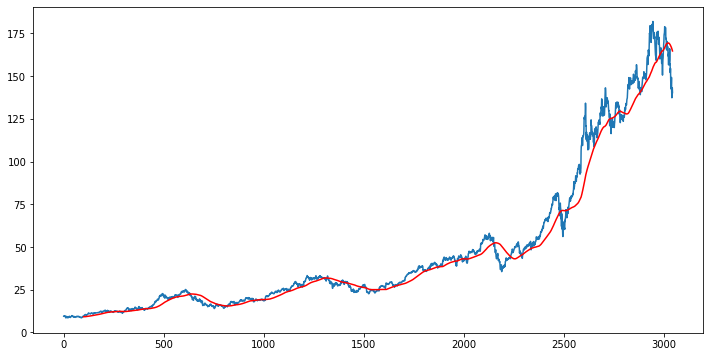

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200=df.Close.rolling(200).mean() 
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3040    159.67120
3041    159.62320
3042    159.57585
3043    159.56070
3044    159.53205
Name: Close, Length: 3045, dtype: float64

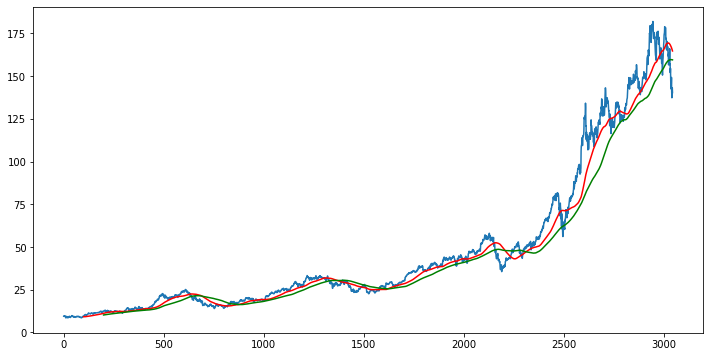

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [14]:
df.shape

(3045, 5)

In [15]:
#Splitting data into training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int (len(df))])

print(data_training.shape)
print(data_testing.shape)

(2131, 1)
(914, 1)


In [60]:
data_training.head()

,Close
0,9.516786
1,9.672500
2,9.625000
3,9.358571
4,9.342857


In [61]:
data_testing.head()

,Close
2131,55.942501
2132,56.717499
2133,54.090000
2134,53.612499
2135,55.527500


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02204332],
       [0.0251831 ],
       [0.02422533],
       ...,
       [1.        ],
       [0.97943296],
       [0.96078142]])

In [20]:
data_training_array.shape

(2131, 1)

In [21]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train),np.array(y_train)

In [22]:
x_train.shape


(2031, 100, 1)

In [23]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [24]:
model=Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
64/64 [==============================] - 41s 245ms/step - loss: 0.0630
Epoch 2/50
64/64 [==============================] - 15s 241ms/step - loss: 0.0057
Epoch 3/50
64/64 [==============================] - 15s 233ms/step - loss: 0.0049
Epoch 4/50
64/64 [==============================] - 14s 214ms/step - loss: 0.0060
Epoch 5/50
64/64 [==============================] - 13s 211ms/step - loss: 0.0043
Epoch 6/50
64/64 [==============================] - 15s 231ms/step - loss: 0.0056
Epoch 7/50
64/64 [==============================] - 14s 216ms/step - loss: 0.0050
Epoch 8/50
64/64 [==============================] - 14s 213ms/step - loss: 0.0041
Epoch 9/50
64/64 [==============================] - 15s 241ms/step - loss: 0.00372s - l
Epoch 10/50
64/64 [==============================] - 17s 259ms/step - loss: 0.0039
Epoch 11/50
64/64 [==============================] - 16s 251ms/step - loss: 0.0034
Epoch 12/50
64/64 [==============================] - 17s 262ms/step - loss: 0.0037
Epoch 1

In [27]:
model.save('keras_model.h5')

In [28]:
data_testing.head()

,Close
2131,55.942501
2132,56.717499
2133,54.090000
2134,53.612499
2135,55.527500


In [29]:
data_training.tail(100)

,Close
2031,47.044998
2032,46.747501
2033,46.577499
2034,46.907501
2035,46.790001
...,...
2126,56.814999
2127,57.320000
2128,58.017502
2129,56.997501


In [30]:
past_100_days=data_training.tail(100)

In [31]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [32]:
final_df.head()

,Close
0,47.044998
1,46.747501
2,46.577499
3,46.907501
4,46.790001


In [33]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.07850131],
       [0.07647009],
       [0.07530937],
       ...,
       [0.69671418],
       [0.73440303],
       [0.7156269 ]])

In [34]:
input_data.shape

(1014, 1)

In [35]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])

    y_test.append(input_data[i,0])

In [36]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(914, 100, 1)
(914,)


In [37]:
#Making Predictions

y_predicted=model.predict(x_test)

In [38]:
y_predicted.shape

(914, 1)

In [39]:
y_test

array([0.13925067, 0.14454211, 0.12660237, 0.12334215, 0.13641717,
       0.1283093 , 0.13648544, 0.13484681, 0.12602203, 0.13163779,
       0.13392506, 0.13747546, 0.12443458, 0.13247419, 0.12649996,
       0.11956987, 0.1213792 , 0.13086968, 0.13660494, 0.1114449 ,
       0.10139113, 0.10511224, 0.115661  , 0.11316891, 0.10630708,
       0.08872578, 0.08541435, 0.07614578, 0.08401469, 0.08763335,
       0.07454126, 0.05938379, 0.05904241, 0.05137833, 0.05535546,
       0.05470684, 0.06614321, 0.06377059, 0.06211488, 0.07276608,
       0.0588888 , 0.05552616, 0.04489204, 0.04678673, 0.04513101,
       0.04593327, 0.04909106, 0.03975419, 0.03712555, 0.0407613 ,
       0.03191943, 0.02498933, 0.0145771 , 0.00792012, 0.02556968,
       0.02382861, 0.02396517, 0.02654264, 0.02684987, 0.        ,
       0.010361  , 0.00979771, 0.01461125, 0.01898096, 0.01981736,
       0.01723989, 0.01333105, 0.01857132, 0.02176325, 0.02333362,
       0.02497227, 0.0189639 , 0.02002218, 0.01793974, 0.02657

In [41]:
y_predicted

array([[0.21749972],
       [0.21840645],
       [0.21930082],
       [0.22004247],
       [0.2204856 ],
       [0.2206168 ],
       [0.22042683],
       [0.21998532],
       [0.21937072],
       [0.21860972],
       [0.21776107],
       [0.21689866],
       [0.21610077],
       [0.21535355],
       [0.2146785 ],
       [0.214059  ],
       [0.21343759],
       [0.21277845],
       [0.21211927],
       [0.21154055],
       [0.21096951],
       [0.2102842 ],
       [0.20940804],
       [0.20836583],
       [0.20720083],
       [0.20593126],
       [0.20450246],
       [0.20286578],
       [0.20097299],
       [0.19885096],
       [0.19657472],
       [0.19417484],
       [0.19163409],
       [0.1889531 ],
       [0.18612987],
       [0.18320546],
       [0.1802375 ],
       [0.17734757],
       [0.1746349 ],
       [0.17216656],
       [0.17004386],
       [0.16824764],
       [0.16672163],
       [0.16537434],
       [0.16413462],
       [0.16294645],
       [0.16178158],
       [0.160

In [42]:
scaler.scale_

array([0.00682769])

In [43]:
scale_factor=1/0.00524879
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

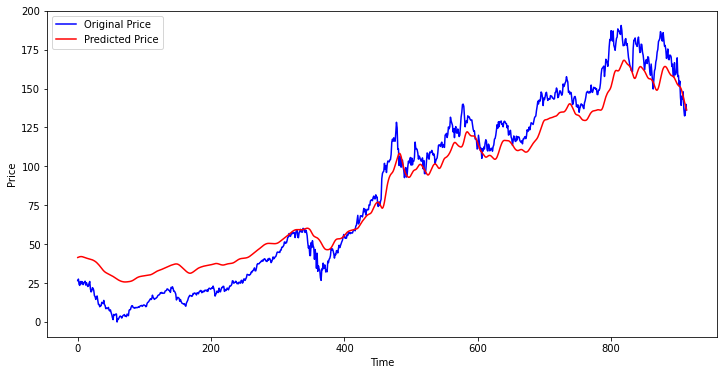

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
